[남북한발전량 비교]
- 데이터 : 남북한발전전력량.xlsx
- 기간   : 1990 ~ 2017 


[1] 모듈 로딩 및 데이터준비 <hr>

In [1]:
import pandas as pd                         # 데이터 분석 및 전처리 모듈
import matplotlib.pyplot as plt             # 데이터 시각화 모듈
import utils

In [2]:

# [1-2] epdlxj wnsql

D_FILE = '../DATA/남북한발전전력량.xlsx'
F_PATH = r'C:\Users\KDT17\Desktop\KDT_7\03.VISIUAL\DATA\Font\H2GTRE.TTF'


[2] 데이터 로딩 및 폰트설정 <hr>

In [3]:
## [2-1] 폰트 설정

utils.set_HangulFont(F_PATH)

HYGothic-Extra폰트 설정


In [4]:
# [2-2] 데이터 로딩

dataDF = pd.read_excel(D_FILE) # RangeIndex 정수 인덱스 로딩
#dataDF = pd.read_excel(D_FILE, index_col=[0,1]) # 0번, 1번 컬럼 멀티인덱스 지정 후 로딩
dataDF.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [5]:
# 데이터 기본 정보 확인

dataDF.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

In [6]:
# 기본 정보 및 데이터 확인 결과
# - 전력량 (억kwh) 컬럼 : 결측치는 이전 행 값으로 채우기
# - 1990년 ~ 2017년 컬럼 : '-' 를 '0' 형변환, objext => int 형 변환
# - 신재생 컬럼         : 북한측에 존재하지 않는 행 => 신재생 추가

[3] 데이터 전처리 <hr>

In [7]:
# [3-1] 전력량(억kwh) 컬럼 : 결측치는 이전 행 값으로 채우기

dataDF['전력량 (억㎾h)'].ffill(inplace=True)
dataDF

C:\Users\KDT17\AppData\Local\Temp\ipykernel_1488\2240014836.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataDF['전력량 (억㎾h)'].ffill(inplace=True)


,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,북한,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,북한,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,북한,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [8]:
# [3-2] 1990년 ~ 2017년 컬럼 : '-'를 '0' 형변환, object => int 형변환

dataDF = dataDF.replace('-','0').copy()
dataDF.iloc[:,2:].astype(int)




,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,64,51,49,60,41,55,52,54,61,61,...,50,56,56,65,78,77,84,78,58,66
2,484,573,696,803,1022,1122,1264,1420,1195,1302,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,529,563,565,581,587,670,739,771,897,1031,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,86,118,151,173,195
5,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
6,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
7,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dataDF.columns
print(dataDF.columns)

dataDF[dataDF.columns[2:]] = dataDF[dataDF.columns[2:]].replace('-',0)

Index(['전력량 (억㎾h)', '발전 전력별', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')


In [10]:
# [3-3] 북한 신재생 행 추가

dataDF[dataDF.columns[2:]] = dataDF[dataDF.columns[2:]].astype('int')

In [11]:
# 전체 컬럼 데이터 타입 확인
dataDF.dtypes

전력량 (억㎾h)    object
발전 전력별       object
1990          int64
1991          int64
1992          int64
1993          int64
1994          int64
1995          int64
1996          int64
1997          int64
1998          int64
1999          int64
2000          int64
2001          int64
2002          int64
2003          int64
2004          int64
2005          int64
2006          int64
2007          int64
2008          int64
2009          int64
2010          int64
2011          int64
2012          int64
2013          int64
2014          int64
2015          int64
2016          int64
dtype: object

In [12]:
# [3-3] 신재생 행 : 북한측에 없는 행 => 추가
#dataDF.loc[dataDF.shape[0]] = 0
# dataDF.tail()

# 추가된 행의 원소값 변경
dataDF.loc[dataDF.index[-1],'전력량 (억㎾h)'] = '북한'
dataDF.loc[dataDF.index[-1],'발전 전력별'] = '신재생'
#dataDF.loc[dataDF.shape[0]] = 0

In [13]:
# dataDF.loc[-1]['전력량 (억㎾h)'] = '북한' 행 시리즈를 뽑아서 값지정

[4-1] 수력분석 <hr>

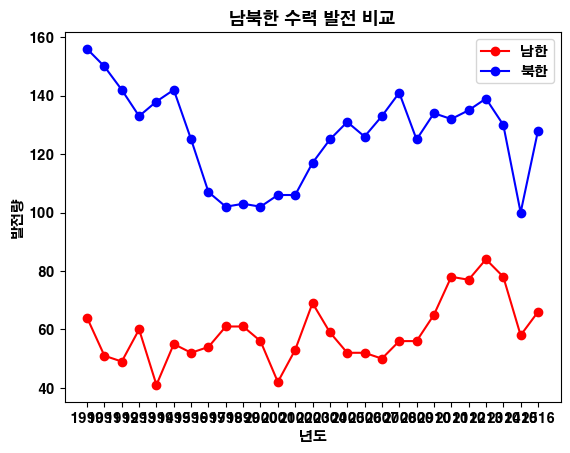

In [14]:
# 남한 과 북한의 수력 발전량 추출
# - x축 : 년도
# - y축 : 발전량 - 수력

# year = []

# for i in dataDF.columns[2:]:    
#     year.append(i)

ydata1 = dataDF.iloc[1, 2:]
ydata2 = dataDF.iloc[6, 2:]

plt.plot(ydata1,'or-', label="남한")
plt.plot(ydata2,'ob-',label='북한')
plt.title('남북한 수력 발전 비교')
plt.xlabel('년도')
plt.ylabel('발전량')
plt.legend()
plt.show()
# # 남한의 수력
# dataDF.loc[1][2:] 

# # 북한의 수력
# dataDF.loc[6]



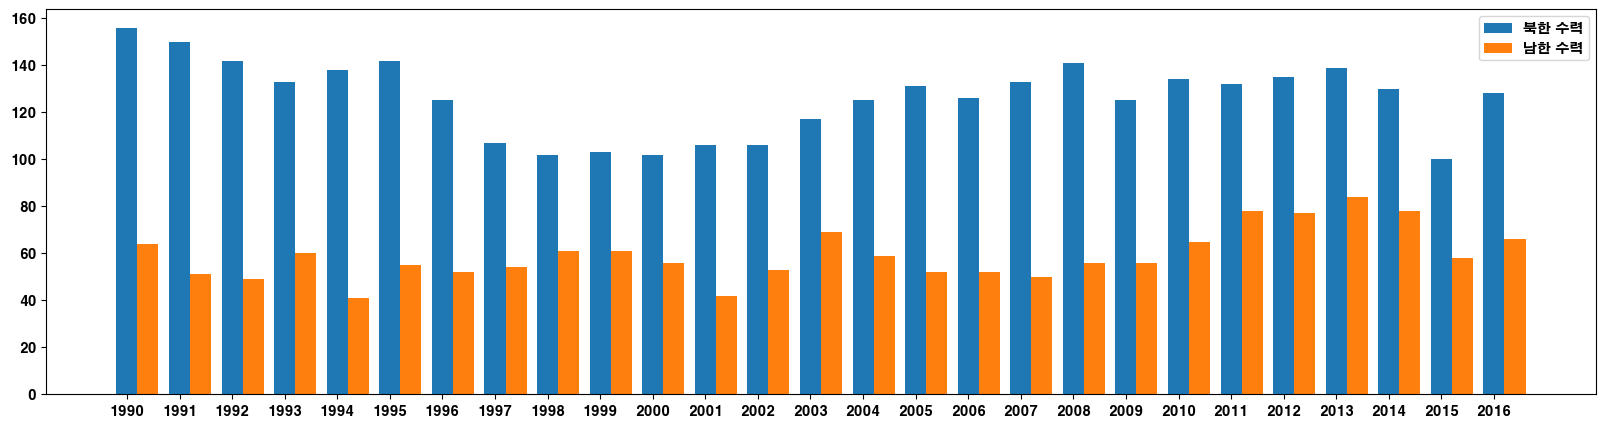

In [30]:
# 막대그래프 버젼

ydata1 = dataDF.iloc[1, 2:]
ydata2 = dataDF.iloc[6, 2:]
xdata = dataDF.columns[2:].astype(int)

plt.figure(figsize=(20,5))

plt.bar(xdata, ydata2, label='북한 수력', width=0.4)
plt.bar(xdata+0.4, ydata1 ,label="남한 수력",width=0.4)
plt.xticks(xdata)
plt.legend()